# Aspect-Based Sentiment Analysis along with BERTopic modeling 4

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os

# Get the current working directory (typically where the notebook is located or executed)
current_dir = os.getcwd()

# Define the project root relative to the current working directory
project_root = os.path.abspath(os.path.join(current_dir, "../"))  # Adjust this based on your folder structure

# Add project_root to sys.path
sys.path.append(project_root)

from src.models.inference import BERTSentimentAnalysisStrategyPredict
from src.models.topic_modeling import BERTopicModelingStrategy, TopicModelingContext

C:\Users\Geeneth\Desktop\Code\Machine Learning\PycharmProjects\Advanced Sentiment Analysis\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Loading data

In [ ]:
data_path_prediction = '../data/processed/cleaned_and_preprocessed_reviews.csv'
prediction_dataset = pd.read_csv(data_path_prediction)
prediction_dataset        

,text,rating,date,location,review_length,word_count
0,delicious thai restaurant look fresh flavorful...,5,"Dec 4, 2024","Temecula, CA",198,33
1,come valentine food good order tomyum soup duc...,3,"Feb 15, 2025","Jacksonville, FL",485,82
2,unfortunately husband react msg ajinomoto flav...,1,"Oct 25, 2024","Kailua, HI",733,131
3,food deliciousthe drawback fact card accept pa...,4,"Jan 7, 2025","San Rafael, CA",165,26
4,great place thai food long know extremely busy...,4,"Feb 6, 2024","San Clemente, CA",345,69
5,good thai food large portion flavor place busy...,5,"Jan 2, 2024","Cupertino, CA",336,59
6,come looklng indonesian food dinner early even...,4,"Feb 22, 2024","Portishead, United Kingdom",509,98
7,food good people nice sitting look menu order ...,4,"Mar 29, 2024","Lakeside, CA",129,29
8,hungry absolutely solid thai partner love pad ...,5,"Aug 24, 2022","Calgary, Canada",162,32
9,overall food good enjoy papaya salad habe get ...,5,"Jan 1, 2024","Champaign, IL",224,39


### Predict data

In [3]:
bert_strategy = BERTSentimentAnalysisStrategyPredict("../models/saved_models")

In [4]:
aspects = ["food", "service", "restaurant", "delivery", "price"]

# Predict sentiment for each row and each aspect
for aspect in aspects:
    prediction_dataset[f"Sentiment_{aspect}"] = prediction_dataset["text"].apply(
        lambda sentence: bert_strategy.analyze_sentiment(aspect, sentence)["sentiment"]
    )

In [5]:
# Convert to long format for visualization
prediction_dataset_long = prediction_dataset.melt(id_vars=["text"],
                          value_vars=[f"Sentiment_{aspect}" for aspect in aspects],
                          var_name="Aspect",
                          value_name="Sentiment")

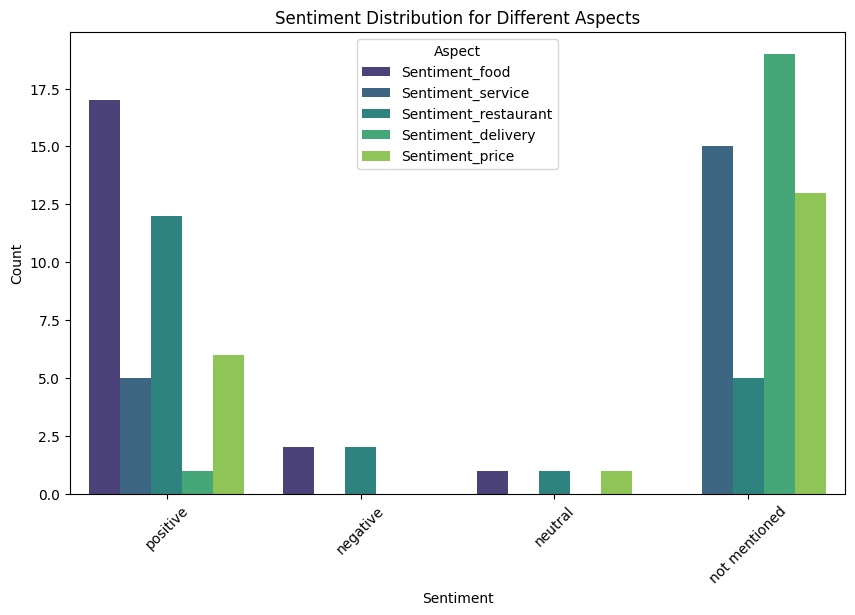

,text,rating,date,location,review_length,word_count,Sentiment_food,Sentiment_service,Sentiment_restaurant,Sentiment_delivery,Sentiment_price
0,delicious thai restaurant look fresh flavorful...,5,"Dec 4, 2024","Temecula, CA",198,33,positive,positive,positive,not mentioned,not mentioned
1,come valentine food good order tomyum soup duc...,3,"Feb 15, 2025","Jacksonville, FL",485,82,positive,not mentioned,positive,not mentioned,positive
2,unfortunately husband react msg ajinomoto flav...,1,"Oct 25, 2024","Kailua, HI",733,131,negative,not mentioned,negative,not mentioned,not mentioned
3,food deliciousthe drawback fact card accept pa...,4,"Jan 7, 2025","San Rafael, CA",165,26,positive,not mentioned,not mentioned,not mentioned,not mentioned
4,great place thai food long know extremely busy...,4,"Feb 6, 2024","San Clemente, CA",345,69,positive,not mentioned,positive,not mentioned,positive


In [6]:
# Visualization: Sentiment Distribution for all aspects
plt.figure(figsize=(10, 6))
sns.countplot(x="Sentiment", hue="Aspect", data=prediction_dataset_long, palette="viridis")
plt.title("Sentiment Distribution for Different Aspects")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.legend(title="Aspect")
plt.xticks(rotation=45)
plt.show()

# Display first few rows with predictions
prediction_dataset.head()

In [7]:
prediction_dataset

,text,rating,date,location,review_length,word_count,Sentiment_food,Sentiment_service,Sentiment_restaurant,Sentiment_delivery,Sentiment_price
0,delicious thai restaurant look fresh flavorful...,5,"Dec 4, 2024","Temecula, CA",198,33,positive,positive,positive,not mentioned,not mentioned
1,come valentine food good order tomyum soup duc...,3,"Feb 15, 2025","Jacksonville, FL",485,82,positive,not mentioned,positive,not mentioned,positive
2,unfortunately husband react msg ajinomoto flav...,1,"Oct 25, 2024","Kailua, HI",733,131,negative,not mentioned,negative,not mentioned,not mentioned
3,food deliciousthe drawback fact card accept pa...,4,"Jan 7, 2025","San Rafael, CA",165,26,positive,not mentioned,not mentioned,not mentioned,not mentioned
4,great place thai food long know extremely busy...,4,"Feb 6, 2024","San Clemente, CA",345,69,positive,not mentioned,positive,not mentioned,positive
5,good thai food large portion flavor place busy...,5,"Jan 2, 2024","Cupertino, CA",336,59,positive,not mentioned,positive,not mentioned,not mentioned
6,come looklng indonesian food dinner early even...,4,"Feb 22, 2024","Portishead, United Kingdom",509,98,neutral,not mentioned,neutral,not mentioned,neutral
7,food good people nice sitting look menu order ...,4,"Mar 29, 2024","Lakeside, CA",129,29,positive,not mentioned,positive,not mentioned,positive
8,hungry absolutely solid thai partner love pad ...,5,"Aug 24, 2022","Calgary, Canada",162,32,positive,not mentioned,not mentioned,not mentioned,not mentioned
9,overall food good enjoy papaya salad habe get ...,5,"Jan 1, 2024","Champaign, IL",224,39,positive,positive,positive,not mentioned,not mentioned


In [8]:
positive_delivery_reviews = prediction_dataset[prediction_dataset['Sentiment_delivery'] == 'positive']
positive_delivery_reviews

,text,rating,date,location,review_length,word_count,Sentiment_food,Sentiment_service,Sentiment_restaurant,Sentiment_delivery,Sentiment_price
16,place definitely live hype line stop service s...,5,"Jan 3, 2019","Los Angeles, CA",539,95,positive,positive,positive,positive,not mentioned


In [9]:
# prediction_dataset.loc[21]["text"]

In [10]:
# prediction_dataset.loc[21]

In [11]:
# prediction_dataset.loc[6]["text"]

In [12]:
# prediction_dataset.loc[3]["text"]

### BERTopic modeling

In [13]:
topic_strategy = BERTopicModelingStrategy()
context = TopicModelingContext(topic_strategy)

In [14]:
# Perform topic modeling
df = context.analyze_reviews(prediction_dataset)

# Display results
print(df)

                                                 text  rating          date  \
0   delicious thai restaurant look fresh flavorful...       5   Dec 4, 2024   
1   come valentine food good order tomyum soup duc...       3  Feb 15, 2025   
2   unfortunately husband react msg ajinomoto flav...       1  Oct 25, 2024   
3   food deliciousthe drawback fact card accept pa...       4   Jan 7, 2025   
4   great place thai food long know extremely busy...       4   Feb 6, 2024   
5   good thai food large portion flavor place busy...       5   Jan 2, 2024   
6   come looklng indonesian food dinner early even...       4  Feb 22, 2024   
7   food good people nice sitting look menu order ...       4  Mar 29, 2024   
8   hungry absolutely solid thai partner love pad ...       5  Aug 24, 2022   
9   overall food good enjoy papaya salad habe get ...       5   Jan 1, 2024   
10  nice food large portion low price recommend th...       5  Dec 14, 2023   
11  authentic thai flavourseven wednesday evening ..

In [15]:
# Visualize Topics
# topic_strategy.visualize_topics_data()

In [16]:
df.columns

Index(['text', 'rating', 'date', 'location', 'review_length', 'word_count',
       'Sentiment_food', 'Sentiment_service', 'Sentiment_restaurant',
       'Sentiment_delivery', 'Sentiment_price', 'Topic'],
      dtype='object')

In [17]:
df

,text,rating,date,location,review_length,word_count,Sentiment_food,Sentiment_service,Sentiment_restaurant,Sentiment_delivery,Sentiment_price,Topic
0,delicious thai restaurant look fresh flavorful...,5,"Dec 4, 2024","Temecula, CA",198,33,positive,positive,positive,not mentioned,not mentioned,-1
1,come valentine food good order tomyum soup duc...,3,"Feb 15, 2025","Jacksonville, FL",485,82,positive,not mentioned,positive,not mentioned,positive,-1
2,unfortunately husband react msg ajinomoto flav...,1,"Oct 25, 2024","Kailua, HI",733,131,negative,not mentioned,negative,not mentioned,not mentioned,-1
3,food deliciousthe drawback fact card accept pa...,4,"Jan 7, 2025","San Rafael, CA",165,26,positive,not mentioned,not mentioned,not mentioned,not mentioned,-1
4,great place thai food long know extremely busy...,4,"Feb 6, 2024","San Clemente, CA",345,69,positive,not mentioned,positive,not mentioned,positive,-1
5,good thai food large portion flavor place busy...,5,"Jan 2, 2024","Cupertino, CA",336,59,positive,not mentioned,positive,not mentioned,not mentioned,-1
6,come looklng indonesian food dinner early even...,4,"Feb 22, 2024","Portishead, United Kingdom",509,98,neutral,not mentioned,neutral,not mentioned,neutral,-1
7,food good people nice sitting look menu order ...,4,"Mar 29, 2024","Lakeside, CA",129,29,positive,not mentioned,positive,not mentioned,positive,-1
8,hungry absolutely solid thai partner love pad ...,5,"Aug 24, 2022","Calgary, Canada",162,32,positive,not mentioned,not mentioned,not mentioned,not mentioned,-1
9,overall food good enjoy papaya salad habe get ...,5,"Jan 1, 2024","Champaign, IL",224,39,positive,positive,positive,not mentioned,not mentioned,-1


### Saving the predicted dataset along with ABSA sentiments for visualization

In [ ]:
df.to_csv('../data/visualization/cleaned_and_preprocessed_absa_sentimented_reviews.csv', index=False)